# Calculating solution pH by Python

### See more: https://pypi.org/project/pHcalc/

## Project description
pHcalc
pHcalc is a Python library for systematically calculating solution pH, distribution diagrams, and titration curves.

This package is Python 3.5 compatible with dependencies only on Numpy and Scipy. If you will be plotting the data, then there is an optional dependency on Matplotlib as well.

Bug fixes, questions, and update requests are encouraged and can be filed at the GitHub repo.

## Dependencies
Numpy >= 1.10
Scipy >= 0.17
Optional Packages
Matplotlib >= 1.5
## Installation
pHcalc is only a single Python file, so installation is quite simple. After installation of the dependencies, the most recent version of pHcalc is available via pip, either from PyPI (stable) or the GitHub repo (most recent).

## From PyPI:

In [15]:
!pip install pHcalc

You should consider upgrading via the 'c:\users\rnd\anaconda3\python.exe -m pip install --upgrade pip' command.


## Background
pHcalc calculates the pH of a complex system of potentially strong and weak acids and bases using a systematic equilibrium solution method. This method is described in detail in the Journal of Chemical Education and in this ChemWiki article, for example. (There is also another, older Pascal program called PHCALC, which uses matrix algebra to accomplish the same task. To the best of my knowledge, the source code for this program is no longer available.)

Basically, this method finds the optimum pH for the mixture by systematically adjusting the pH until a charge balance is achieved, i.e. the concentrations of positively charged ions equals the charge for the negatively charged ions. For (polyprotic) weak acids, the fractional distribution of the species at a given pH value is determined. Multiplying this by the concentration of acid in solution provides the concentration of each acidic species in the system, and these concentrations are used to balance the charge.

Using this methodology bases and strong acids can be described using neutral, charged species. These are ions that do not react with water, such as Na+ and Cl-. In this context, any Cl- in solution must be charged balanced with an appropriate amount of H3O+, which would define HCl in solution. Na+ must be offset by an equivalent amount of OH-, which defines a solution of NaOH. A 1:1 combination of Na+ and H2CO3 would describe a solution of NaHCO3, the additional equivalent of OH- is implied by the charge imbalance.

## Example Usage
pHcalc defines three classes - Acid, Neutral, and System - which are used in calculating the pH of the system. H3O+ and OH- are never explicitly defined. The H3O+ concentration is adjusted internally, and OH- is calculated using KW.

In [2]:
from pHcalc.pHcalc import Acid, Neutral, System
import numpy as np
import matplotlib.pyplot as plt # Optional for plotting below

## pH of 0.01 M HCl
First of all, HCl completely dissociates in water to give equal amounts of H3O+ and Cl-. Because H3O+ is adjusted internally, all you need to define is Cl-. This implies a single equivalent of H3O+ in order to balance the charge of the system.

In [3]:
cl = Neutral(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 1.9999

1.9999977111816385


## pH of 1e-8 M HCl
This is a notoriously tricky example for introductory chemistry students; however, pHcalc handles it nicely.

In [5]:
cl = Neutral(charge=-1, conc=1e-8)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 6.978295898 (NOT 8!)

6.9782958984375005


## pH of 0.01 M NaOH
This example is very similar to our HCl example, except that our Neutral species must have a positive charge. The charge balance is achieved internally by the System using an equivalent amount of OH-.

In [6]:
na = Neutral(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH) # Should print 12.00000

12.000002288818362


## pH of 0.01 M HF
Here we will use an Acid object instance to define the weak acid HF, which has a Ka of 6.76e-4 and a pKa of 3.17. You can use either value when you create the Acid instance. When defining an Acid species, you must always define a charge keyword argument, which is the charge of the fully protonated species.

In [8]:
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
# hf = Acid(pKa=3.17, charge=0, conc=0.01) will also work
system = System(hf)
system.pHsolve()
print(system.pH) # Should print 2.6413261

2.6413261413574203


In [10]:
# hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
hf = Acid(pKa=3.17, charge=0, conc=0.01) # will also work
system = System(hf)
system.pHsolve()
print(system.pH) # Should print 2.6413261

2.641304779052733


## pH of 0.01 M NaF
This system consist of a 1:1 mixture of an HF Acid instance and a Na+ Neutral instance. The System object can be instantiated with an arbitrary number of Acids and Neutral objects. Again, there is an implied equivalent of OH- necessary to balance the charge of the system.

In [11]:
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
na = Neutral(charge=1, conc=0.01)
system = System(hf, na)
system.pHsolve()
print(system.pH) # Should print 7.5992233

7.59922332763672


## pH of 0.01 M H2CO3
The Ka and pKa attributes can also accept lists of values for polyprotic species.

In [12]:
carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=0.01)
system = System(carbonic)
system.pHsolve()
print(system.pH) # Should print 2.8343772

2.8343772888183576


## pH of 0.01 M Alanine Zwitterion Form
Alanine has two pKa values, 2.35 and 9.69, but the fully protonated form is positively charged. In order to define the neutral zwitterion, only the positively charged Acid object needs to be defined. The charge balance in this case implies a single equivalent of OH-.

In [13]:
ala = Acid(pKa=[2.35, 9.69], charge=1, conc=0.01)
system = System(ala)
system.pHsolve()
print(system.pH) # Should print 6.0991569

6.099156951904295


## pH of 0.01 M (NH4)3PO4
This is equivalent to a 1:3 mixture of H3PO4 and NH4+, both of which are defined by Acid objects. Three equivalents of OH- are implied to balance the charge of the system.

In [14]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
nh4 = Acid(pKa=9.25, charge=1, conc=0.01*3)
system = System(phos, nh4)
system.pHsolve()
print(system.pH) # Should print 8.95915298

8.95915298461914


## Distribution Diagrams
Acid objects also define a function called alpha, which calculates the fractional distribution of species at a given pH. This function can be used to create distribution diagrams for weak acid species. alpha takes a single argument, which is a single pH value or a Numpy array of values. For a single pH value, the function returns a Numpy array of fractional distributions ordered from most acid to least acidic species.

In [21]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phos.alpha(7.0)
#array([ 8.6055e-06, 6.1204e-01, 3.8795e-01, 1.8611e-06])
# This is H3PO4, H2PO4-, HPO4_2-, and HPO4_3-

array([8.60553811e-06, 6.12037500e-01, 3.87952033e-01, 1.86113567e-06])

In [19]:
!pip install --upgrade pip
!pip install --upgrade --user pip

Requirement already up-to-date: pip in c:\users\rnd\anaconda3\lib\site-packages (20.2.3)
Requirement already up-to-date: pip in c:\users\rnd\anaconda3\lib\site-packages (20.2.3)


For a Numpy array og pH values, a 2D array of fractional distribution values is returned, where each row is a series of distributions for each given pH. The 2D returned array can be used to plot a distribution diagram.

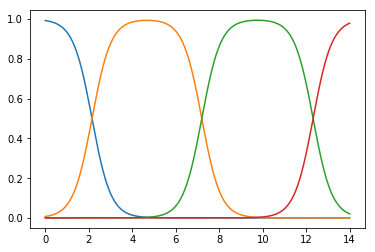

In [22]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phs = np.linspace(0, 14, 1000)
fracs = phos.alpha(phs)
plt.plot(phs, fracs)
plt.show()

## Titration Curves
Using a simple loop, we can also construct arbitrary titration curves as well. In this example, we will titrate H3PO4 with NaOH. The guess_est keyword argument for the System.pHsolve method forces the calculation of a best guess for starting the pH optimization algorithm. This may speed up the evaluation of the pH and can also be used if the minimizer throws an error during the pH calculation.

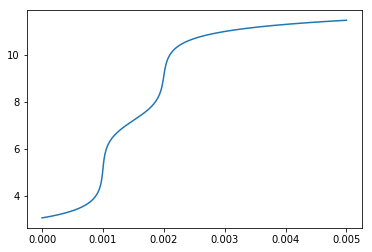

In [24]:
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
    na = Neutral(charge=1, conc=mol/sol_volume)
    system = System(phos, na)
    system.pHsolve(guess_est=True)
    phs.append(system.pH)
plt.plot(na_moles, phs)
plt.show()

# 